In [4]:
import sys
sys.path.append('../src')
from vsa import VSA
import numpy as np

vsa = VSA(dim=2048)

np.random.seed(42)
# We now need only 10 concepts for 5 facts
concepts = [f'concept_{i}' for i in range(10)]
atomic_vectors = {concept: np.random.normal(0, 1/np.sqrt(vsa.dim), vsa.dim) for concept in concepts}

# Create 5 bound facts (instead of 50)
facts = []
for i in range(0, 10, 2):
    role = atomic_vectors[concepts[i]]
    filler = atomic_vectors[concepts[i+1]]
    bound = vsa.bind(role, filler)
    facts.append(bound)

# Bundle all 5 facts into the memory vector M
M = vsa.bundle(facts)
print('HKM created with 5 facts.')

HKM created with 5 facts.


In [5]:
true_scores = []
false_scores = []

# True queries (all 5 facts present)
for i in range(0, 10, 2):
    role = atomic_vectors[concepts[i]]
    expected_filler = atomic_vectors[concepts[i+1]]
    retrieved = vsa.unbind(role, M)
    # Cosine similarity calculation
    coherence = np.dot(retrieved, expected_filler) / (np.linalg.norm(retrieved) * np.linalg.norm(expected_filler))
    true_scores.append(coherence)

# False queries (5 facts not present)
false_concepts = [f'false_concept_{j}' for j in range(10)]
false_atomic = {c: np.random.normal(0, 1/np.sqrt(vsa.dim), vsa.dim) for c in false_concepts}
for j in range(0, 10, 2):
    role = false_atomic[false_concepts[j]]
    expected_filler = false_atomic[false_concepts[j+1]]
    retrieved = vsa.unbind(role, M)
    coherence = np.dot(retrieved, expected_filler) / (np.linalg.norm(retrieved) * np.linalg.norm(expected_filler))
    false_scores.append(coherence)
print('Coherence scores calculated.')

Coherence scores calculated.


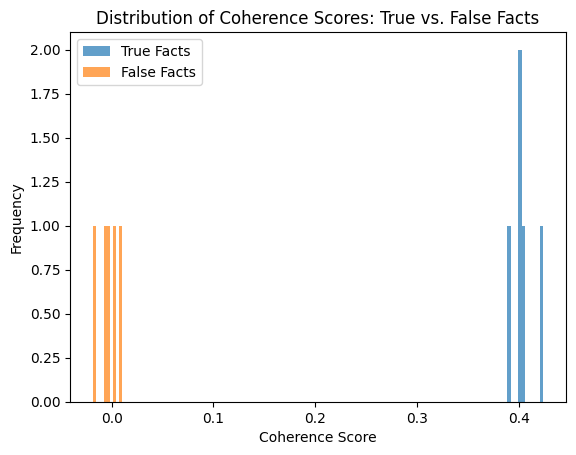

In [6]:
import matplotlib.pyplot as plt

plt.hist(true_scores, bins=10, alpha=0.7, label='True Facts')
plt.hist(false_scores, bins=10, alpha=0.7, label='False Facts')
plt.legend()
plt.xlabel('Coherence Score')
plt.ylabel('Frequency')
plt.title('Distribution of Coherence Scores: True vs. False Facts')
plt.show()